Load a Small Dataset

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


Visualize Some Samples

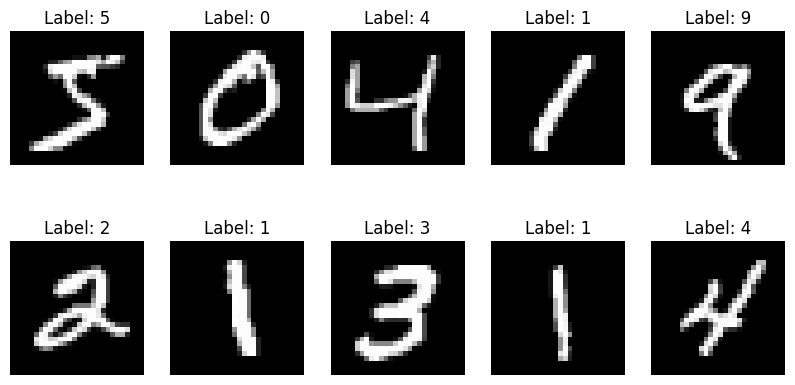

In [3]:
import matplotlib.pyplot as plt

# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras import layers, models

def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_lenet_model()


C:\Users\3122215002012\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8540 - loss: 0.5189 - val_accuracy: 0.9657 - val_loss: 0.1187
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9636 - loss: 0.1206 - val_accuracy: 0.9772 - val_loss: 0.0820
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0755 - val_accuracy: 0.9817 - val_loss: 0.0680
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9827 - val_loss: 0.0620
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9825 - val_loss: 0.0527


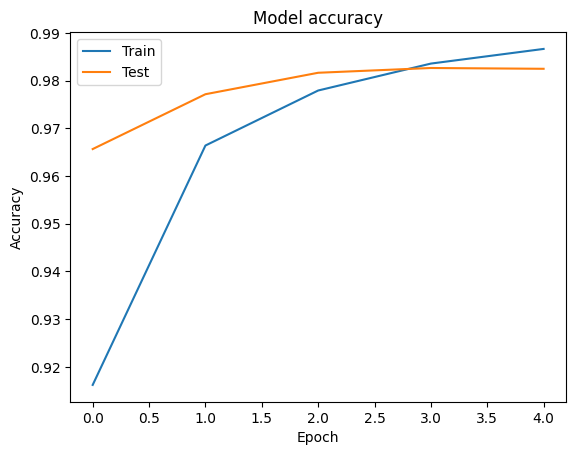

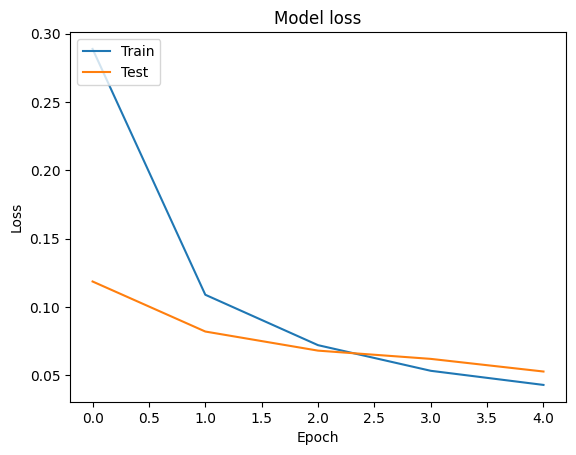

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0584
Test Loss: 0.05120952054858208
Test Accuracy: 0.984000027179718


**Experimenting with Different Hyperparameters**

In [9]:
from tensorflow.keras.optimizers import Adam

def create_lenet_model_with_params(learning_rate=0.001, batch_size=64, num_neurons=84):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_neurons, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Parameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
num_neurons_list = [64, 84, 128]

results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_neurons in num_neurons_list:
            print(f"Training with learning_rate={lr}, batch_size={batch_size}, num_neurons={num_neurons}")
            model = create_lenet_model_with_params(learning_rate=lr, batch_size=batch_size, num_neurons=num_neurons)
            history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.1, verbose=2)
            test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'num_neurons': num_neurons,
                'test_loss': test_loss,
                'test_accuracy': test_accuracy
            })


Training with learning_rate=0.001, batch_size=32, num_neurons=64
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9283 - loss: 0.2398 - val_accuracy: 0.9720 - val_loss: 0.0939
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9728 - loss: 0.0928 - val_accuracy: 0.9792 - val_loss: 0.0726
Epoch 3/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9807 - val_loss: 0.0660
Epoch 4/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9847 - loss: 0.0467 - val_accuracy: 0.9833 - val_loss: 0.0641
Epoch 5/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9850 - val_loss: 0.0527
Training with learning_rate=0.001, batch_size=32, num_neurons=84
Epoch 1/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9284 - loss: 0.2378 - val_accuracy: 0.9715 - val_loss: 0.0937
Epoch 2/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9725 - loss: 0.0915 - val_accuracy: 0.9763 - val_loss: 0.0785
Epoch 3/5
1688/1688 - 4s - 2ms/step - accuracy: 0.9809 - loss: 0.0625 - val_accuracy: 

Implement Regularization Techniques

In [10]:
from tensorflow.keras import regularizers

def create_lenet_model_with_dropout_and_l2(dropout_rate=0.5, l2_reg=0.01):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with and without Dropout/L2
regularization_results = {}

# Without regularization
print("Training without regularization")
model_no_reg = create_lenet_model_with_params()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_no_reg, test_accuracy_no_reg = model_no_reg.evaluate(x_test, y_test, verbose=0)

# With Dropout and L2
print("Training with Dropout and L2 regularization")
model_reg = create_lenet_model_with_dropout_and_l2()
history_reg = model_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_reg, test_accuracy_reg = model_reg.evaluate(x_test, y_test, verbose=0)

regularization_results['no_regularization'] = (test_loss_no_reg, test_accuracy_no_reg)
regularization_results['with_regularization'] = (test_loss_reg, test_accuracy_reg)


Training without regularization
Epoch 1/5
844/844 - 3s - 4ms/step - accuracy: 0.9126 - loss: 0.2933 - val_accuracy: 0.9677 - val_loss: 0.1166
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9673 - loss: 0.1075 - val_accuracy: 0.9793 - val_loss: 0.0768
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9790 - loss: 0.0687 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 4/5
844/844 - 2s - 3ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9833 - val_loss: 0.0524
Epoch 5/5
844/844 - 2s - 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9828 - val_loss: 0.0575
Training with Dropout and L2 regularization
Epoch 1/5
844/844 - 3s - 4ms/step - accuracy: 0.8587 - loss: 0.8998 - val_accuracy: 0.9395 - val_loss: 0.4919
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9230 - loss: 0.5346 - val_accuracy: 0.9507 - val_loss: 0.4247
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9383 - loss: 0.4699 - val_accuracy: 0.9543 - val_loss: 0.3964
Epoch 4/5
844/844 - 2s - 3ms/step - accuracy

Plot Training and Validation Accuracy/Loss

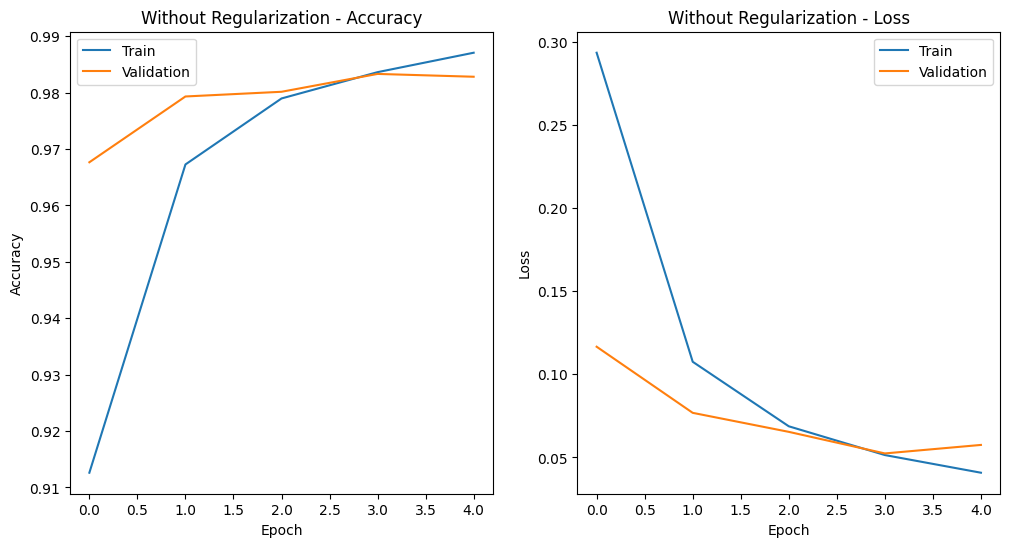

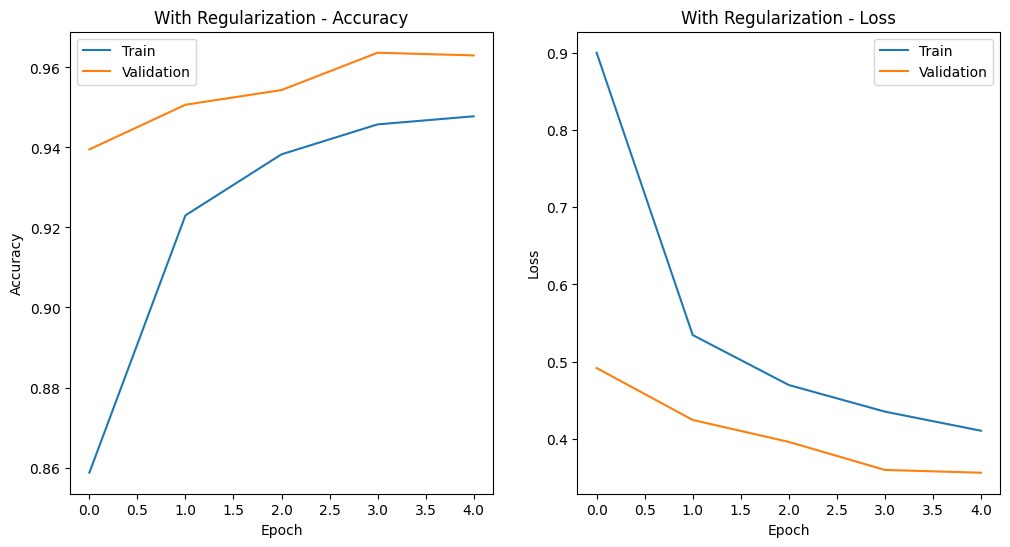

In [11]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_history(history_no_reg, 'Without Regularization')
plot_history(history_reg, 'With Regularization')


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


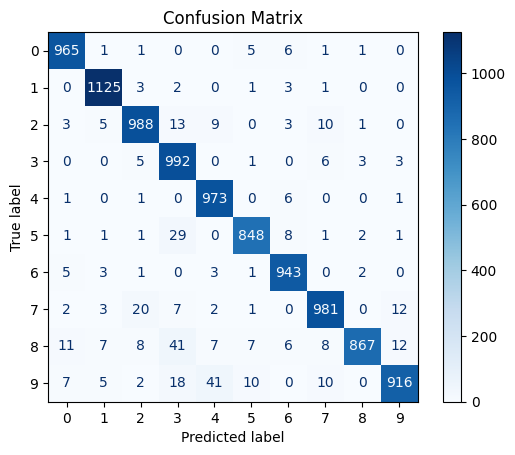

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = model_reg.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


4.Visualization of filters and feature maps in cnn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


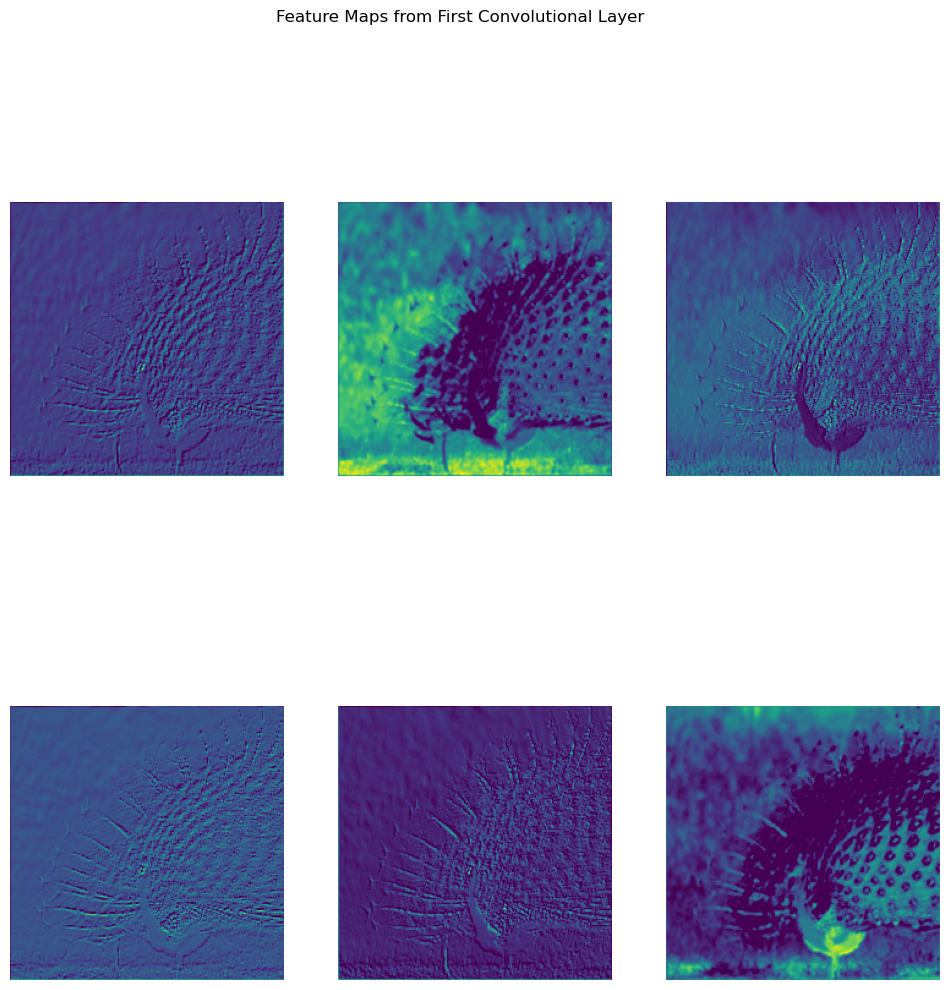

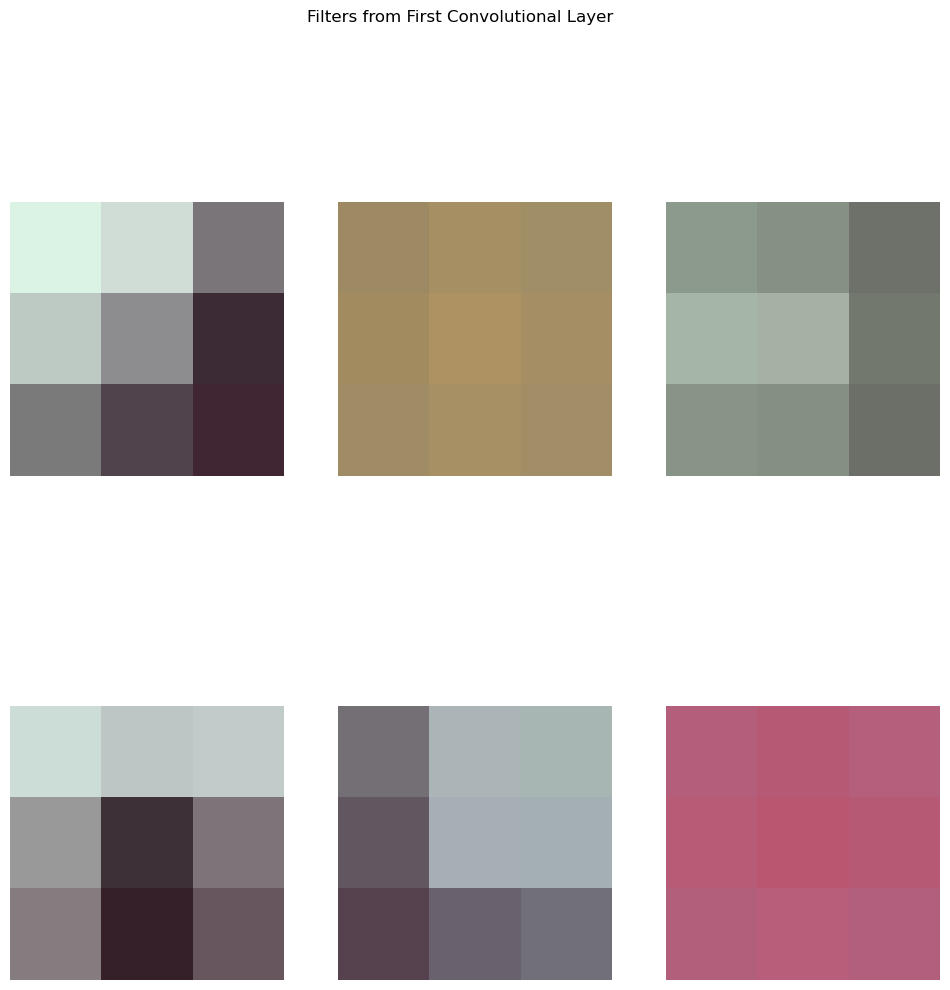

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image

# Load VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

# Load and preprocess an image
img_path = 'image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Scale to [0, 1]

# Get the output of the first convolutional layer
layer_outputs = model.layers[1].output
feature_map_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
feature_maps = feature_map_model.predict(img_array)

# Visualize the first few feature maps
num_feature_maps = feature_maps.shape[-1]
plt.figure(figsize=(12, 12))
for i in range(min(6, num_feature_maps)):  # Display first 6 feature maps
    plt.subplot(2, 3, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps from First Convolutional Layer')
plt.show()

# Get the weights of the first convolutional layer
filters, biases = model.layers[1].get_weights()

# Normalize filter values to 0-1 for better visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters
plt.figure(figsize=(12, 12))
for i in range(min(6, filters.shape[3])):  # Display first 6 filters
    plt.subplot(2, 3, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters from First Convolutional Layer')
plt.show()


5.Build CNN model for Image Classification

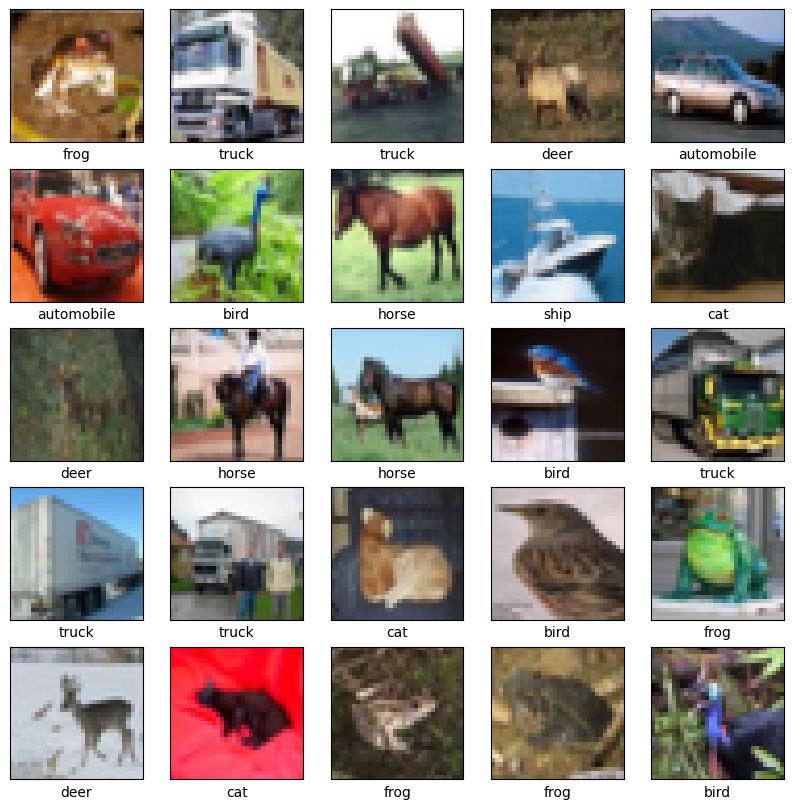

c:\Users\DPLP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3543 - loss: 1.7463 - val_accuracy: 0.5330 - val_loss: 1.3483
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5835 - loss: 1.1745 - val_accuracy: 0.6033 - val_loss: 1.1280
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6447 - loss: 1.0149 - val_accuracy: 0.6433 - val_loss: 1.0193
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6826 - loss: 0.9018 - val_accuracy: 0.6833 - val_loss: 0.9014
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7065 - loss: 0.8428 - val_accuracy: 0.6933 - val_loss: 0.8880
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7357 - loss: 0.7698 - val_accuracy: 0.6942 - val_loss: 0.8843
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7490 - loss: 0.7170 - val_accuracy: 0.6922 - val_loss: 0.9076
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7661 - loss: 0

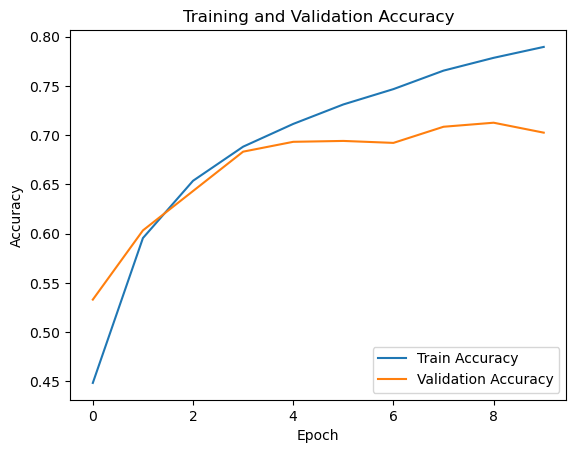

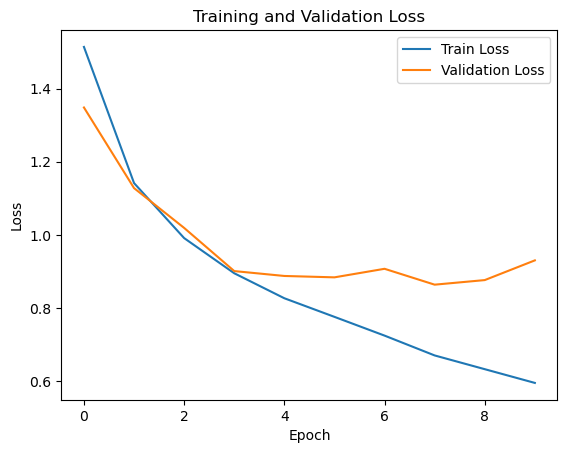

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


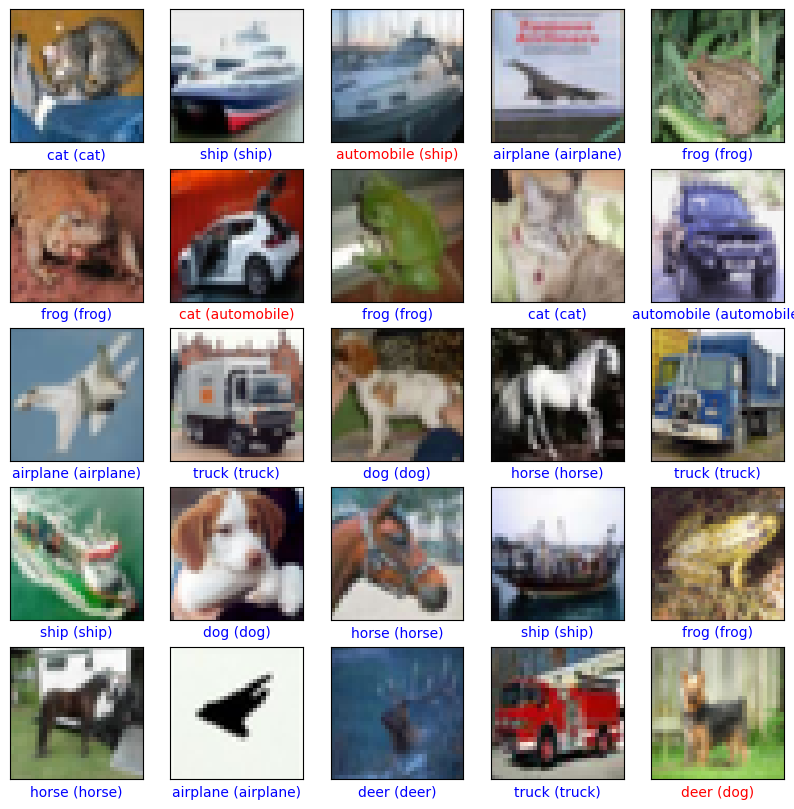

In [2]:
3# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to be in the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display an example from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output before feeding it into the fully connected layer
model.add(layers.Flatten())

# Fully connected layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each class in CIFAR-10)
model.add(layers.Dense(10))

# Print model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Make predictions on the test data
predictions = model.predict(test_images)

# Function to display an image with its prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()


6.Use Pre-trained CNN models for feature extraction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Feature map shape: (1, 7, 7, 512)


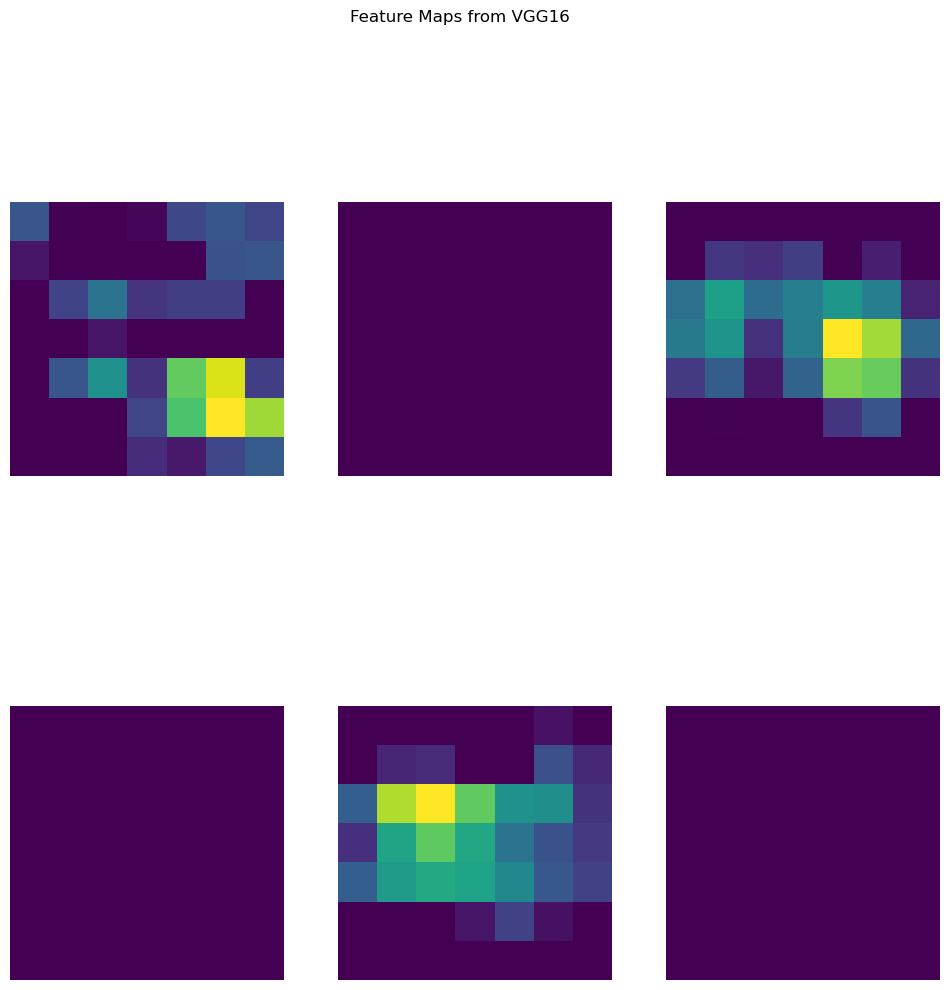

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load VGG16 model pre-trained on ImageNet without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Scale to [0, 1]
    return img_array

# Function to extract features
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    features = base_model.predict(img_array)
    return features

# Load and preprocess an image
img_path = 'horse.jpg'  # Replace with your image path
features = extract_features(img_path)

# Print the shape of the feature map
print("Feature map shape:", features.shape)

# Visualize the feature map
num_feature_maps = features.shape[-1]
plt.figure(figsize=(12, 12))
for i in range(min(6, num_feature_maps)):  # Display first 6 feature maps
    plt.subplot(2, 3, i + 1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps from VGG16')
plt.show()
